# Preamble

This notebook should be used when your dataset has not been built because your audio files have not passed at least one test needed for its uploading on the OSmOSE platform. It also allows to perform (irreversible) file deletion operations to meet uploading criteria.

Define the names of the dataset and of the folder of audio files (by default, 'original')

In [1]:
dataset = 'boussole_MERMAID_v2'
audio_folder_name = 'original'

Download the metadata csv file 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path_audio = '/home/datawork-osmose/dataset/'+dataset+'/data/audio/'+audio_folder_name+'/'
path_file_metadata = path_audio+'file_metadata.csv'
file_metadata = pd.read_csv(path_file_metadata)

# Exploring / describing metadata

In [6]:
file_metadata.head()

,filename,timestamp,duration,origin_sr,duration_inter_file,size,sampwidth,channel_count,status_read_header
0,20211011_102229_UTC_BOUSSOLE.wav,2021-10-11T10:22:29.000000+0000,1706.88000,50000.0,NaN,256.032036,3.0,1.0,True
1,20211011_105143_UTC_BOUSSOLE.wav,2021-10-11T10:51:43.000000+0000,436.52856,50000.0,-1270.35144,65.479320,3.0,1.0,True
2,20211011_110000_UTC_BOUSSOLE.wav,2021-10-11T11:00:00.000000+0000,1706.88000,50000.0,1270.35144,256.032036,3.0,1.0,True
3,20211011_112826_UTC_BOUSSOLE.wav,2021-10-11T11:28:26.000000+0000,1706.88000,50000.0,0.00000,256.032036,3.0,1.0,True
4,20211011_115653_UTC_BOUSSOLE.wav,2021-10-11T11:56:53.000000+0000,126.25608,50000.0,-1580.62392,18.938448,3.0,1.0,True


In [7]:
file_metadata.describe()

,duration,origin_sr,duration_inter_file,size,sampwidth,channel_count
count,8817.000000,8817.0,8801.000000,8817.000000,8817.0,8817.0
mean,1158.741040,50000.0,-0.519691,173.811192,3.0,1.0
std,754.866997,0.0,1279.046254,113.230050,0.0,0.0
min,0.000000,50000.0,-1706.026560,0.000036,3.0,1.0
25%,126.283920,50000.0,-1580.589120,18.942624,3.0,1.0
50%,1706.880000,50000.0,0.000000,256.032036,3.0,1.0
75%,1706.880000,50000.0,1580.589120,256.032036,3.0,1.0
max,1706.880000,50000.0,1582.277760,256.032036,3.0,1.0


## Reading header

In [8]:
print('Number of file headers that cannot be read :',sum(file_metadata['status_read_header'].values == False))

Number of file headers that cannot be read : 17


## Sampling rate

,Sampling rate (Hz),Counts
0,50000.0,8817


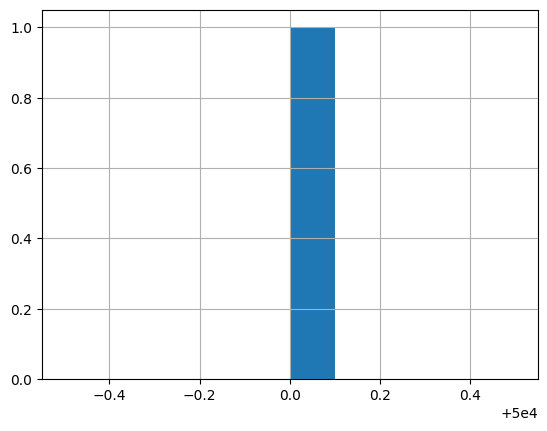

In [9]:
df_da=file_metadata['origin_sr'].value_counts().reset_index()
df_da.columns = ['Sampling rate (Hz)', 'Counts']
df_da['Sampling rate (Hz)'].hist()
df_da

## Duration

,Duration(s),Counts
0,1706.88000,5770
1,126.28392,461
2,126.26304,450
3,126.27696,379
4,126.27000,361
5,126.25608,314
6,126.29088,258
7,126.30912,204
8,126.29784,167
9,0.00000,147


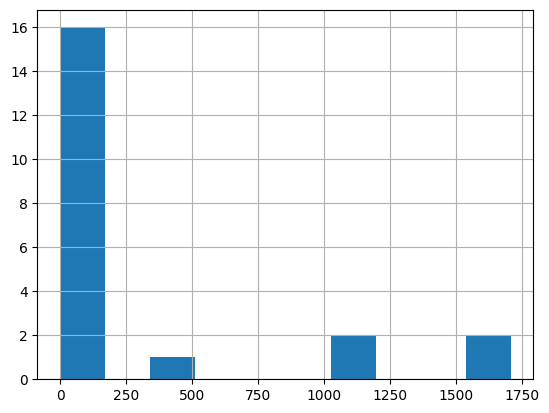

In [10]:
df_da=file_metadata['duration'].value_counts().reset_index()
df_da.columns = ['Duration(s)', 'Counts']
df_da['Duration(s)'].hist()
df_da

# Delete audio files based on criteria metadata

The cells below allow you to delete some audio files that would not respect certain criteria. These files are stored in the list `list_files_to_be_deleted` and the last cell below can be used to operate the deletion directly from this notebook, but be carefull this operation is irreversible!

Each deletion will generate automatically a text file in your current working directory containing the list of the deleted files so you can keep track of this operation.

Note that each criterion is exclusive, meaning that they should be used independently from each other. 

Also note that the file `'file_metadata.csv'` and the pandas variable `file_metadata` is directly updated.

## Criterion 1 : files with non-readable headers

In [22]:
list_files_to_be_deleted = list(file_metadata[file_metadata['status_read_header'].values == False]['filename'])
criterion = 1
print(f'Number of files to be removed : {len(list_files_to_be_deleted)}')

Number of files to be removed : 0


## Criterion 2 : files with duration under a certain value 

Change the value of `duration_value` (in seconds) below

In [26]:
duration_value = 60

list_files_to_be_deleted = list(file_metadata[file_metadata['duration'].values < duration_value]['filename'])
criterion = 2
print(f'Number of files to be removed : {len(list_files_to_be_deleted)}')

Number of files to be removed : 0


## Deletion code

Used carefully ! There is a "garde-fou" variable `DO_operation` that should be set to True to use this code 

In [37]:
DO_operation = False

for file_name in list_files_to_be_deleted:
    try:
        if DO_operation:
            os.remove( path_audio + file_name)
            file_metadata.drop(file_metadata.loc[file_metadata['filename']==file_name].index, inplace=True)
            print(f'File {file_name} removed')
    except: 
        print(f'File {file_name} could not be removed')   

if DO_operation:
    if criterion==2:
        textp = f"Following files were removed based on the duration criterion with a value of {duration_value} (in seconds) : \n\n"
        fn = 'deleted_files_criterion_duration.txt'
    elif criterion==1:
        textp = f"Following files were removed based on the non-readable header criterion : \n\n"
        fn = 'deleted_files_criterion_nonreadable_header.txt'

    with open(fn, 'w') as f:
        if criterion==2:
            f.write(textp)
        elif criterion==1:
            f.write(f"Following files were removed based on the non-readable header criterion : \n\n")
        for line in list_files_to_be_deleted:
            f.write(f"{line}\n")